# Projet data
        Définition des fonction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
#Bayesien
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# logistic regression 
from sklearn.linear_model import LogisticRegression 
# l'assurance de l'équilibre du dataset ( dealing with imbalanced data)
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# le centrage des données 
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import decomposition
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,roc_curve,auc


#################################### l'import des bibliothèques ##########################################################

In [2]:
def normalisation(dataframe):
    x = dataframe.iloc[:, :-1].values #returns a numpy array
    X_scaler = preprocessing.StandardScaler()
    x_scaled = X_scaler.fit_transform(x)
    dataframe = pd.DataFrame(x_scaled,columns=["V1","V2"])
    return dataframe

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def grid_serch_cv(model,param_grid,xTrain,yTrain,xTest,yTest):
    kfold =KFold(n_splits=10, random_state=7)
    grid = GridSearchCV(model, param_grid, cv=kfold)
    grid.fit(xTrain,yTrain)
    m=grid.best_params_
    modelss = grid.best_estimator_
    scor = modelss.score(xTest,yTest)
    clr = classification_report(yTest,modelss.predict(xTest))
    return m, scor, clr

In [5]:
# prepare models
models = []
models.append(('NB'))
models.append(('LR'))
models.append(('LDA'))
models.append(('KNN'))
models.append(('CART'))
models.append(('QDA'))
models.append(('RF'))
models.append(('SVM'))
def comparaison_classification(models,xTrain,yTrain,xTest,yTest):
    compare = []
    comp=[]
    confl=[]
    for name in models:
        if(name == 'KNN'):
            param_grid = {'n_neighbors': np.arange(2, 6), 'metric':['euclidean','manhattan'] }
            x, y, conf = grid_serch_cv(KNeighborsClassifier(),param_grid,xTrain,yTrain,xTest,yTest)   
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'RF'):
            param_grid = {'n_estimators': np.arange(2, 6)}
            x, y, conf = grid_serch_cv(RandomForestClassifier(),param_grid,xTrain,yTrain,xTest,yTest) 
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'SVM'):
            param_grid = {'kernel':['linear', 'poly', 'rbf']}
            x, y, conf = grid_serch_cv(SVC(),param_grid,xTrain,yTrain,xTest,yTest) 
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'CART'):
            param_grid =  {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3]}
            x, y, conf = grid_serch_cv(DecisionTreeClassifier(),param_grid,xTrain,yTrain,xTest,yTest)   
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'NB'):
            param_grid= {}
            x, y, conf = grid_serch_cv(GaussianNB(),param_grid,xTrain,yTrain,xTest,yTest) 
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'LDA'):
            param_grid= {'solver':['svd', 'lsqr'] }
            x, y, conf = grid_serch_cv(LinearDiscriminantAnalysis(),param_grid,xTrain,yTrain,xTest,yTest)
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'LR'):
            param_grid= {"penalty" : ['l1', 'l2'],
              "solver":['newton-cg', 'liblinear'], }
            x, y, conf = grid_serch_cv(LogisticRegression(),param_grid,xTrain,yTrain,xTest,yTest)
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'QDA'):
            param_grid= {'reg_param': [0.1, 0.2, 0.3], }
            x, y, conf = grid_serch_cv(QuadraticDiscriminantAnalysis(),param_grid,xTrain,yTrain,xTest,yTest)
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
    return compare, comp, confl

In [6]:
# prepare models
models = []
models.append(('NB'))
models.append(('LR'))
models.append(('LDA'))
models.append(('CART'))
models.append(('QDA'))
models.append(('RF'))
models.append(('KNN'))
models.append(('SVM'))
def comparaison_classification_credit_card(models,xTrain,yTrain,xTest,yTest):
    compare = []
    comp=[]
    confl=[]
    for name in models:
        if(name == 'KNN'):
            param_grid = {'n_neighbors': np.arange(2, 6), 'metric':['euclidean','manhattan'] }
            x, y, conf = grid_serch_cv(KNeighborsClassifier(),param_grid,xTrain,yTrain,xTest,yTest)   
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'RF'):
            param_grid = {'n_estimators': np.arange(2, 6)}
            x, y, conf = grid_serch_cv(RandomForestClassifier(),param_grid,xTrain,yTrain,xTest,yTest) 
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'SVM'):
            param_grid = {}
            x, y, conf = grid_serch_cv(SVC(),param_grid,xTrain,yTrain,xTest,yTest) 
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'CART'):
            param_grid =  {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3]}
            x, y, conf = grid_serch_cv(DecisionTreeClassifier(),param_grid,xTrain,yTrain,xTest,yTest)   
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'NB'):
            param_grid= {}
            x, y, conf = grid_serch_cv(GaussianNB(),param_grid,xTrain,yTrain,xTest,yTest) 
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'LDA'):
            param_grid= {'solver':['svd', 'lsqr'] }
            x, y, conf = grid_serch_cv(LinearDiscriminantAnalysis(),param_grid,xTrain,yTrain,xTest,yTest)
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'LR'):
            param_grid= {"solver":['newton-cg', 'liblinear'], }
            x, y, conf = grid_serch_cv(LogisticRegression(),param_grid,xTrain,yTrain,xTest,yTest)
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
        if(name == 'QDA'):
            param_grid= {'reg_param': [0.1, 0.2], }
            x, y, conf = grid_serch_cv(QuadraticDiscriminantAnalysis(),param_grid,xTrain,yTrain,xTest,yTest)
            compare.append((name,x,y))
            comp.append(y)
            confl.append(conf)
            print(name)
    return compare, comp, confl

In [7]:
def correlation(df,x_size=5,y_size=5):
    correl = df.corr(method = 'pearson')
    sns.set(rc={'figure.facecolor':'white'})
    fig, ax = plt.subplots(figsize=(x_size,y_size)) 
    correl_final = sns.heatmap(correl, vmin = -1, vmax = 1, center = 0, cmap = "RdBu_r", square = True, ax=ax)
    correl_final.set_title('Correlation', fontsize = 25, loc = 'left')
    return round(correl,2)

In [8]:
def suppression(visa_df_enc):
    column=visa_df_enc.columns
    useless_vars = []
    for col in visa_df_enc.columns:
        if len(visa_df_enc[col].value_counts()) == 1:
            useless_vars.append(col)
    l1=[]
    l=()
    for i in range (0, len(column)-1):
        for j in range (i+1, len(column)):

            if visa_df_enc[column[i]].corr(visa_df_enc[column[j]])>0.95 or visa_df_enc[column[i]].corr(visa_df_enc[column[j]])<-0.95 :
                l=(column[i],column[j])
                l1.append(l)
                useless_vars.append(column[j])

    lwd = []

    for i in useless_vars:
        if i not in lwd: lwd.append(i)
    for i in lwd:
        visa_df_enc.drop(columns=[i], inplace=True)
    return visa_df_enc

In [9]:
def meilleures_methodes(y,l, conf):
    m = max(l)
    f=[]
    [f.append(i) for i, j in enumerate(l) if j == m]
    print("les meilleurs méthodes sont : (Méthode , paramètre, score)")
    for i in f:
        print(y[i])
        print("le rapport de classification est :")
        print(conf[i])

# SYNTHETIC DATA  ( etude exploratoire )
        data spiral

In [32]:
data_spiral = pd.read_csv("data/spiral.txt", sep="\t", header = None, names=["V1","V2","Classe"])
norm_spiral = normalisation(data_spiral)
print(data_spiral)
norm_spiral.head()

        V1     V2  Classe
0    31.95   7.95       3
1    31.15   7.30       3
2    30.45   6.65       3
3    29.70   6.00       3
4    28.90   5.55       3
..     ...    ...     ...
307  15.75  13.85       2
308  15.65  14.05       2
309  15.65  14.25       2
310  15.65  14.50       2
311  15.65  14.60       2

[312 rows x 3 columns]


,V1,V2
0,1.858044,-1.224394
1,1.748278,-1.319198
2,1.652233,-1.414003
3,1.549327,-1.508807
4,1.439561,-1.574441


<AxesSubplot:xlabel='V1', ylabel='V2'>

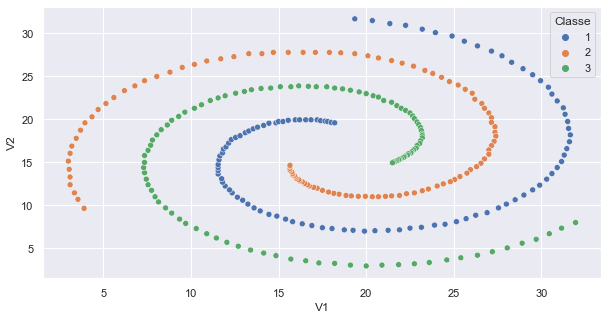

In [33]:
f,ax= plt.subplots(figsize=(10,5))
sns.scatterplot(data=data_spiral, x="V1", y="V2", hue="Classe", palette = "deep")

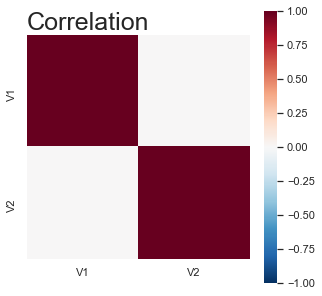

In [34]:
corr = correlation(norm_spiral,5,5)

In [35]:
print("Spiral")
data_spiral.iloc[:,:-1].describe()

Spiral


,V1,V2
count,312.000000,312.000000
mean,18.408173,16.344712
std,7.299923,6.867232
min,3.000000,2.900000
25%,12.912500,11.337500
50%,18.325000,16.050000
75%,23.400000,21.362500
max,31.950000,31.650000


{'whiskers': [<matplotlib.lines.Line2D at 0x1fa641c4940>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa641ce040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa641c45e0>,
 'medians': [<matplotlib.lines.Line2D at 0x1fa641ce700>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fa641cea60>,
 'means': []}

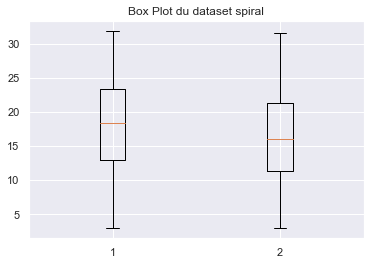

In [36]:
fig2, ax2 = plt.subplots()
ax2.set_title('Box Plot du dataset spiral')
ax2.boxplot(data_spiral.iloc[:,:-1])

        data flame

In [37]:
data_flame = pd.read_csv("data/flame.txt", sep="\t",header = None, names=["V1","V2","Classe"])
norm_flame = normalisation(data_flame)
norm_flame.head()

,V1,V2
0,-1.712779,2.035183
1,-1.869233,1.694577
2,-1.853587,0.687568
3,-2.025686,0.628332
4,-2.135204,0.421006


<AxesSubplot:xlabel='V1', ylabel='V2'>

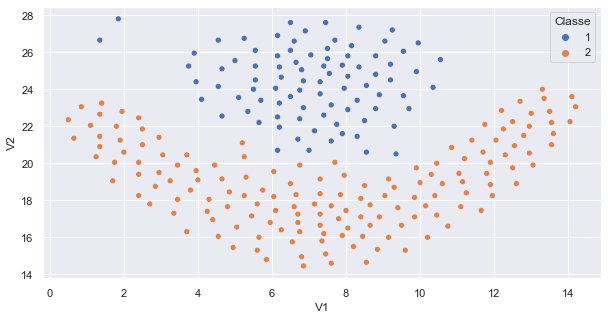

In [38]:
f,ax= plt.subplots(figsize=(10,5))
sns.scatterplot(data=data_flame, x=data_flame.iloc[:,0], y=data_flame.iloc[:,1], hue=data_flame.iloc[:,2], palette = "deep")

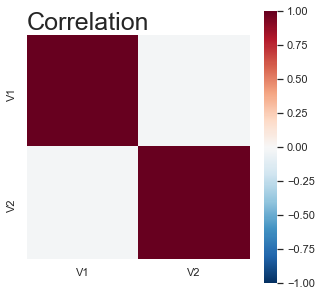

In [39]:
corr = correlation(norm_flame,5,5)

In [40]:
print("Flame")
data_flame.iloc[:, :-1].describe()

Flame


,V1,V2
count,240.000000,240.000000
mean,7.323750,20.928542
std,3.202509,3.383390
min,0.500000,14.450000
25%,5.250000,18.237500
50%,7.300000,20.775000
75%,9.312500,23.562500
max,14.200000,27.800000


{'whiskers': [<matplotlib.lines.Line2D at 0x1fa63ca1d00>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa63cb0400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa63ca19a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1fa63cb0ac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fa63cb0e20>,
 'means': []}

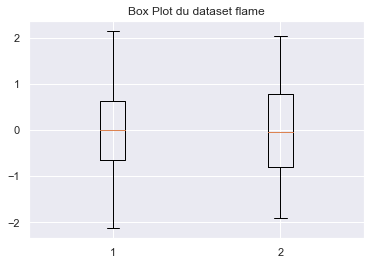

In [48]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot du dataset flame')
ax1.boxplot(norm_flame)

        data aggregation

In [49]:
data_agg = pd.read_csv("data/aggregation.txt", sep="\t",header = None, names=["V1","V2","Classe"])
norm_agg=normalisation(data_agg)
norm_agg.head()

,V1,V2
0,-0.405095,1.790853
1,-0.470647,1.654791
2,-0.516029,1.753745
3,-0.546284,1.809407
4,-0.586624,1.716637


<AxesSubplot:xlabel='V1', ylabel='V2'>

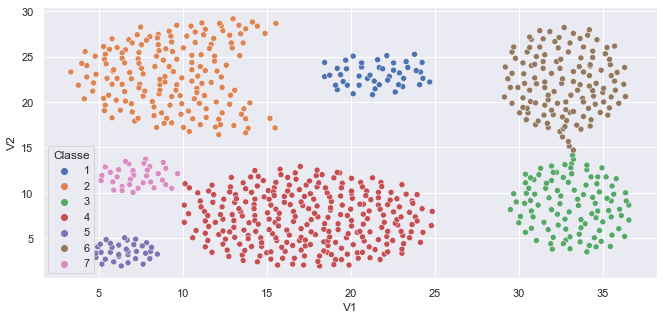

In [50]:
f,ax= plt.subplots(figsize=(11,5))
sns.scatterplot(data=data_agg, x=data_agg.iloc[:,0], y=data_agg.iloc[:,1], hue=data_agg.iloc[:,2], palette = "deep")

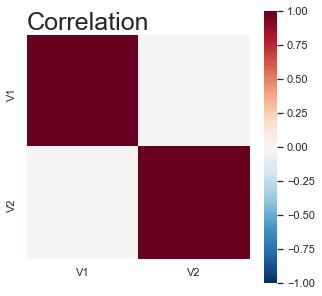

In [51]:
corr = correlation(norm_agg,5,5)

In [52]:

print("Aggregation")
data_agg.iloc[:, :-1].describe()

Aggregation


,V1,V2
count,788.000000,788.000000
mean,19.566815,14.171764
std,9.922042,8.089683
min,3.350000,1.950000
25%,11.150000,7.037500
50%,18.225000,11.725000
75%,30.700000,21.962500
max,36.550000,29.150000


{'whiskers': [<matplotlib.lines.Line2D at 0x1fa63e20f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa63e2c640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa63e20be0>,
 'medians': [<matplotlib.lines.Line2D at 0x1fa63e2cd00>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fa643770a0>,
 'means': []}

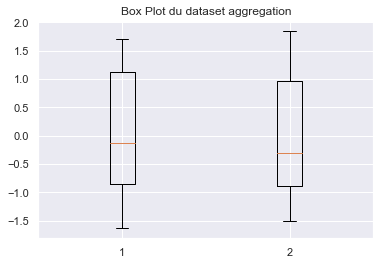

In [53]:
fig3, ax3 = plt.subplots()
ax3.set_title('Box Plot du dataset aggregation')
ax3.boxplot(norm_agg)

# SYTHETIC DATA ( comparaison ) 

In [54]:
xTrains, xTests, yTrains, yTests = train_test_split(norm_spiral, data_spiral.iloc[:,-1],test_size=0.2,random_state=42)
y , l, conf = comparaison_classification(models,xTrains,yTrains,xTests,yTests)
print("méthode / paramètre / score ")
for i in y:
    print(i)

méthode / paramètre / score 
('NB', {}, 0.36507936507936506)
('LR', {'penalty': 'l2', 'solver': 'newton-cg'}, 0.2857142857142857)
('LDA', {'solver': 'svd'}, 0.2857142857142857)
('KNN', {'metric': 'euclidean', 'n_neighbors': 2}, 1.0)
('CART', {'max_leaf_nodes': 9, 'min_samples_split': 2}, 0.7936507936507936)
('SVM', {'kernel': 'rbf'}, 1.0)
('QDA', {'reg_param': 0.2}, 0.36507936507936506)
('RF', {'n_estimators': 3}, 0.873015873015873)


In [55]:
meilleures_methodes(y,l, conf)

les meilleurs méthodes sont : (Méthode , paramètre, score)
('KNN', {'metric': 'euclidean', 'n_neighbors': 2}, 1.0)
le rapport de classification est :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

('SVM', {'kernel': 'rbf'}, 1.0)
le rapport de classification est :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [61]:
xTrainf, xTestf, yTrainf, yTestf = train_test_split(norm_flame, data_flame.iloc[:,-1],test_size=0.2,random_state=42)
y1 , l1, conf = comparaison_classification(models,xTrainf,yTrainf,xTestf,yTestf)
print("méthode / paramètre / score ")
for i in y1:
    print(i)

méthode / paramètre / score 
('NB', {}, 0.9791666666666666)
('LR', {'penalty': 'l2', 'solver': 'newton-cg'}, 0.8958333333333334)
('LDA', {'solver': 'svd'}, 0.8958333333333334)
('KNN', {'metric': 'euclidean', 'n_neighbors': 2}, 0.9791666666666666)
('CART', {'max_leaf_nodes': 6, 'min_samples_split': 2}, 0.9791666666666666)
('SVM', {'kernel': 'rbf'}, 1.0)
('QDA', {'reg_param': 0.1}, 0.9791666666666666)
('RF', {'n_estimators': 5}, 0.9791666666666666)


In [62]:
meilleures_methodes(y1,l1, conf)

les meilleurs méthodes sont : (Méthode , paramètre, score)
('SVM', {'kernel': 'rbf'}, 1.0)
le rapport de classification est :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        30

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [63]:
xTraina, xTesta, yTraina, yTesta = train_test_split(norm_agg, data_agg.iloc[:,-1],test_size=0.2,random_state=42)
y2 , l2, conf = comparaison_classification(models,xTraina,yTraina,xTesta,yTesta) 
print("méthode / paramètre / score ")
for i in y2:
    print(i)

méthode / paramètre / score 
('NB', {}, 0.9936708860759493)
('LR', {'penalty': 'l2', 'solver': 'newton-cg'}, 0.9936708860759493)
('LDA', {'solver': 'svd'}, 0.9873417721518988)
('KNN', {'metric': 'euclidean', 'n_neighbors': 3}, 0.9936708860759493)
('CART', {'max_leaf_nodes': 7, 'min_samples_split': 2}, 1.0)
('SVM', {'kernel': 'linear'}, 0.9873417721518988)
('QDA', {'reg_param': 0.1}, 0.9936708860759493)
('RF', {'n_estimators': 5}, 0.9936708860759493)


In [64]:
meilleures_methodes(y2,l2, conf)

les meilleurs méthodes sont : (Méthode , paramètre, score)
('CART', {'max_leaf_nodes': 7, 'min_samples_split': 2}, 1.0)
le rapport de classification est :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        59
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00         4

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



# REAL DATA
        VISA PREMIER

In [65]:
########################################### VISA PREMIER ######################################################
df_visa = pd.read_csv("data/Visapremier.txt", sep="\t")

#On récupere toutes les valeurs qui ne sont pas numériques et les colonnes comportant des points
#(qui correspondent dans notre dataset à des valeurs nulles)
str_var = df_visa.select_dtypes(exclude=np.number).columns.tolist()

In [66]:
from sklearn import decomposition
enc = OrdinalEncoder()
df_visa_tr = df_visa.copy()
print("dataset initial")
df_visa_tr.head()



dataset initial


,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,...,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,31,1,Shom,51,Fmar,238,Pcad,A,0,...,0,14,2,0,1303700,556967,Coui,0,1,1
1,442153,82,6,Shom,52,Fmar,270,Pcad,A,0,...,19500000,5,2,0,19856243,133896,Coui,0,1,0
2,552427,97,1,Shom,58,Fmar,139,Pcad,C,0,...,0,0,1,0,122745,0,Coui,0,1,0
3,556005,40,1,Shom,27,Fcel,99,Psan,B,0,...,0,14,2,0,83224,0,Coui,0,1,0
4,556686,65,1,Shom,49,Fsep,89,Pemp,A,0,...,0,11,3,1,494773,21423,Coui,0,1,15


In [67]:
#on remplace les valeurs categorielles en leur codage numerique
df_visa_tr[str_var]=enc.fit_transform(df_visa[str_var])
#recuperation de la variable à expliquer
Y = df_visa_tr.cartevpr

In [68]:
print("dataset après la transformation des variables qualitatives ")
df_visa_tr.head()

dataset après la transformation des variables qualitatives 


,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,...,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,8.0,1,1.0,51,3.0,238,2.0,1.0,0,...,0,7.0,2,0,1303700,556967,1.0,0,1,1
1,442153,28.0,6,1.0,52,3.0,270,2.0,1.0,0,...,19500000,43.0,2,0,19856243,133896,1.0,0,1,0
2,552427,33.0,1,1.0,58,3.0,139,2.0,3.0,0,...,0,1.0,1,0,122745,0,1.0,0,1,0
3,556005,12.0,1,1.0,27,1.0,99,7.0,2.0,0,...,0,7.0,2,0,83224,0,1.0,0,1,0
4,556686,21.0,1,1.0,49,4.0,89,3.0,1.0,0,...,0,4.0,3,1,494773,21423,1.0,0,1,15


In [69]:
#suppression de la variable à expliquer (elle existe en double)
df_visa_tr.drop(columns=['cartevp', 'cartevpr','matricul'], inplace=True)

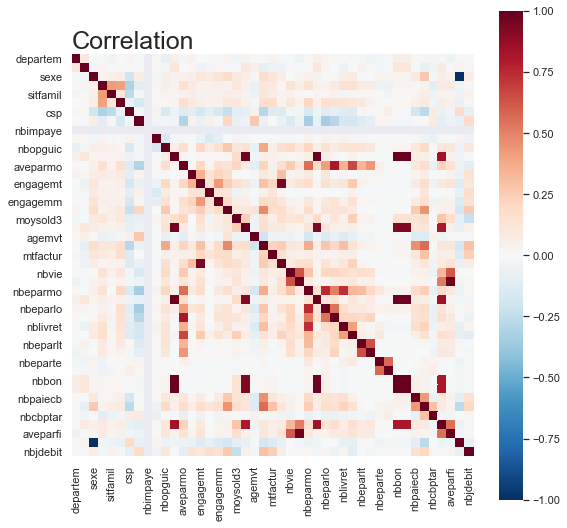

In [70]:
corr = correlation(df_visa_tr,9,9)

In [71]:
#recuperation de la variable à expliquer
df = suppression(df_visa_tr)
df.head()

,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,mtrejet,nbopguic,...,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbpaiecb,nbcb,nbcbptar,avtscpte,nbjdebit
0,8.0,1,1.0,51,3.0,238,2.0,1.0,0,0,...,181794,0,0,0,0,7.0,2,0,1303700,1
1,28.0,6,1.0,52,3.0,270,2.0,1.0,0,4,...,0,0,0,0,0,43.0,2,0,19856243,0
2,33.0,1,1.0,58,3.0,139,2.0,3.0,0,0,...,3402,0,0,0,0,1.0,1,0,122745,0
3,12.0,1,1.0,27,1.0,99,7.0,2.0,0,0,...,30009,0,0,0,0,7.0,2,0,83224,0
4,21.0,1,1.0,49,4.0,89,3.0,1.0,0,0,...,73351,0,0,0,0,4.0,3,1,494773,15


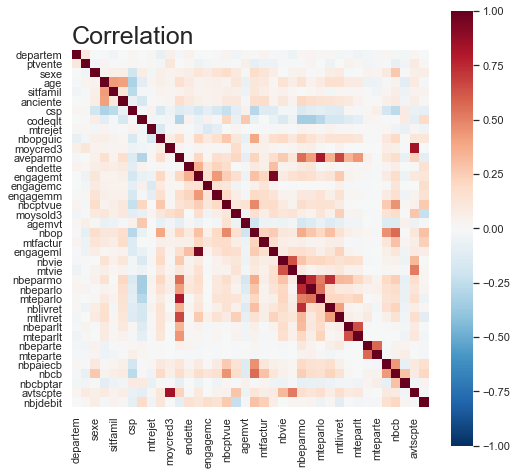

In [72]:
corr = correlation(df,8,8)

In [73]:
df.head()

,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,mtrejet,nbopguic,...,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbpaiecb,nbcb,nbcbptar,avtscpte,nbjdebit
0,8.0,1,1.0,51,3.0,238,2.0,1.0,0,0,...,181794,0,0,0,0,7.0,2,0,1303700,1
1,28.0,6,1.0,52,3.0,270,2.0,1.0,0,4,...,0,0,0,0,0,43.0,2,0,19856243,0
2,33.0,1,1.0,58,3.0,139,2.0,3.0,0,0,...,3402,0,0,0,0,1.0,1,0,122745,0
3,12.0,1,1.0,27,1.0,99,7.0,2.0,0,0,...,30009,0,0,0,0,7.0,2,0,83224,0
4,21.0,1,1.0,49,4.0,89,3.0,1.0,0,0,...,73351,0,0,0,0,4.0,3,1,494773,15


In [74]:
X_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df))

In [75]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.561090,-0.611483,0.778645,0.711608,0.662635,0.518503,-0.764923,-0.881679,0.046063,-0.538317,...,2.650796,-0.197012,-0.130647,-0.05295,-0.030542,-0.290271,1.071989,-0.359007,1.568812,-0.475239
1,2.173634,3.996113,0.778645,0.795645,0.662635,0.723642,-0.764923,-0.881679,0.046063,0.892305,...,-0.341355,-0.197012,-0.130647,-0.05295,-0.030542,1.914327,1.071989,-0.359007,26.727365,-0.518112
2,2.857316,-0.611483,0.778645,1.299864,0.662635,-0.116143,-0.764923,0.589615,0.046063,-0.538317,...,-0.285362,-0.197012,-0.130647,-0.05295,-0.030542,-0.657704,-0.080560,-0.359007,-0.032646,-0.518112
3,-0.014145,-0.611483,0.778645,-1.305268,-1.090774,-0.372566,1.811231,-0.146032,0.046063,-0.538317,...,0.152564,-0.197012,-0.130647,-0.05295,-0.030542,-0.290271,1.071989,-0.359007,-0.086240,-0.518112
4,1.216481,-0.611483,0.778645,0.543535,1.539339,-0.436672,-0.249693,-0.881679,0.046063,-0.538317,...,0.865931,-0.197012,-0.130647,-0.05295,-0.030542,-0.473987,2.224537,2.279452,0.471850,0.124983


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,...,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03
mean,-4.461586e-16,2.297013e-17,3.078825e-15,-2.020751e-16,-3.686603e-16,-4.361221e-17,-8.592071e-16,-9.291522e-17,-4.869513e-17,1.077113e-15,...,-6.343688e-16,-1.898916e-15,8.145602e-16,4.324877e-16,3.621094e-16,-7.227314e-16,7.180753e-16,4.962376e-16,-4.446583e-17,-3.483803e-16
std,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,...,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00,1.000466e+00
min,-1.654980e+00,-6.114835e-01,-1.284283e+00,-2.061596e+00,-1.967478e+00,-1.000802e+00,-1.795385e+00,-1.617326e+00,-3.227049e+01,-5.383165e-01,...,-3.413551e-01,-1.970116e-01,-1.306469e-01,-5.295034e-02,-3.054236e-02,-7.189428e-01,-1.233109e+00,-3.590075e-01,-1.990973e-01,-5.181118e-01
25%,-5.610900e-01,-6.114835e-01,-1.284283e+00,-8.010486e-01,-1.090774e+00,-7.187366e-01,-7.649234e-01,-8.816794e-01,4.606273e-02,-5.383165e-01,...,-3.413551e-01,-1.970116e-01,-1.306469e-01,-5.295034e-02,-3.054236e-02,-7.189428e-01,-1.233109e+00,-3.590075e-01,-1.947795e-01,-5.181118e-01
50%,-5.610900e-01,-6.114835e-01,7.786446e-01,3.931623e-02,6.626348e-01,-1.353747e-01,-2.496925e-01,-1.460324e-01,4.606273e-02,-1.806610e-01,...,-3.392648e-01,-1.970116e-01,-1.306469e-01,-5.295034e-02,-3.054236e-02,-5.352263e-01,-8.056026e-02,-3.590075e-01,-1.665611e-01,-5.181118e-01
75%,1.079745e+00,3.100359e-01,7.786446e-01,7.956446e-01,6.626348e-01,3.774708e-01,7.807693e-01,5.896145e-01,4.606273e-02,1.769945e-01,...,-8.551608e-02,-1.970116e-01,-1.306469e-01,-5.295034e-02,-3.054236e-02,3.221174e-01,1.071989e+00,-3.590075e-01,-4.341089e-02,-8.938198e-02
max,2.857316e+00,4.917633e+00,7.786446e-01,1.888119e+00,3.292747e+00,4.569983e+00,1.811231e+00,2.060908e+00,4.606273e-02,9.476037e+00,...,1.562390e+01,1.993570e+01,1.677051e+01,1.888562e+01,3.274141e+01,2.649193e+00,4.529635e+00,1.019483e+01,2.672737e+01,5.226868e+00


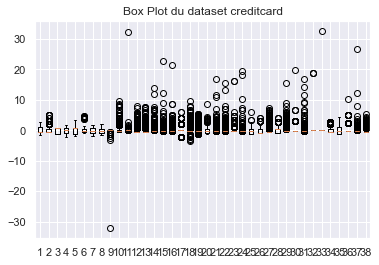

In [132]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot du dataset creditcard')
ax1.boxplot(X_scaled)
X_scaled.describe()

In [76]:
xTrainv, xTestv, yTrainv, yTestv = train_test_split(X_scaled, Y,test_size=0.2,random_state=42)

In [87]:
y3 , l3, conf =comparaison_classification(models,xTrainv,yTrainv,xTestv,yTestv)
print("méthode / paramètre / score ")
for i in y3:
    print(i)


méthode / paramètre / score 
('NB', {}, 0.8046511627906977)
('LR', {'penalty': 'l1', 'solver': 'liblinear'}, 0.8976744186046511)
('LDA', {'solver': 'svd'}, 0.8883720930232558)
('KNN', {'metric': 'manhattan', 'n_neighbors': 5}, 0.7953488372093023)
('CART', {'max_leaf_nodes': 8, 'min_samples_split': 2}, 0.8976744186046511)
('SVM', {'kernel': 'linear'}, 0.8976744186046511)
('QDA', {'reg_param': 0.1}, 0.8)
('RF', {'n_estimators': 5}, 0.8883720930232558)


In [88]:
meilleures_methodes(y3,l3, conf)

les meilleurs méthodes sont : (Méthode , paramètre, score)
('LR', {'penalty': 'l1', 'solver': 'liblinear'}, 0.8976744186046511)
le rapport de classification est :
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       140
           1       0.88      0.81      0.85        75

    accuracy                           0.90       215
   macro avg       0.89      0.88      0.89       215
weighted avg       0.90      0.90      0.90       215

('CART', {'max_leaf_nodes': 8, 'min_samples_split': 2}, 0.8976744186046511)
le rapport de classification est :
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       140
           1       0.90      0.80      0.85        75

    accuracy                           0.90       215
   macro avg       0.90      0.88      0.88       215
weighted avg       0.90      0.90      0.90       215

('SVM', {'kernel': 'linear'}, 0.8976744186046511)
le rapport de classifi

# REAL DATA 
        CREDIT CARD

In [10]:
df=pd.read_csv("data/creditcard.csv")
df.shape 

(284807, 31)

In [11]:
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x288bd6733a0>,
 'caps': [<matplotlib.lines.Line2D at 0x288bd673a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x288bd673040>,
 'medians': [<matplotlib.lines.Line2D at 0x288bd680160>,
 'fliers': [<matplotlib.lines.Line2D at 0x288bd6804c0>,
 'means': []}

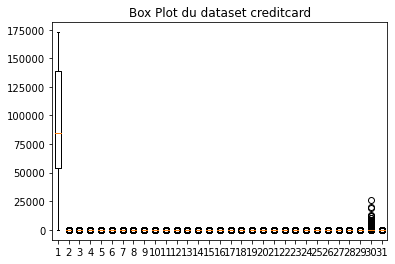

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot du dataset creditcard')
ax1.boxplot(df)

In [15]:
Q3 = np.percentile(df['Amount'], 75)
Q1 = np.percentile(df['Amount'], 25)

# setting the cutoff
cutoff = 5.0

# computing the interquartile range
IQR = (Q3 - Q1)

# computing lower bound and upper bound
lower_bound = Q1 - (IQR * cutoff)
upper_bound = Q3 + (IQR * cutoff)

In [16]:
filter_data = (df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)
# filtering data
outliers = df[filter_data]['Amount']
fraud_outliers = df[(df['Class'] == 1) & filter_data]['Amount']
normal_outliers = df[(df['Class'] == 0) & filter_data]['Amount']

print(f"Nombre des outliers total : {outliers.count()}")
print(f"Nombre des outlies dans la classe Fraud: {fraud_outliers.count()}")
print(f"Nombre des outliers dans la classe No fraude : {normal_outliers.count()}")

Nombre des outliers total : 11366
Nombre des outlies dans la classe Fraud: 41
Nombre des outliers dans la classe No fraude : 11325


In [17]:
df = df.drop(normal_outliers.index)
df.reset_index(inplace=True, drop=True)

In [18]:
df.shape

(273482, 31)

In [19]:
#Scaling data using RobustScaler
from sklearn.preprocessing import StandardScaler,RobustScaler
rb = RobustScaler()
df['Time'] = rb.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = rb.fit_transform(df['Amount'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.997065,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.131371,0
1,-0.997065,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.284446,0
2,-0.997053,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.897238,0
3,-0.997053,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.701907,0
4,-0.997041,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.822098,0


In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,...,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000,273482.000000
mean,0.118169,0.064800,0.130260,0.045680,-0.018979,0.070783,-0.036533,-0.066520,0.018040,0.005332,...,-0.012172,0.006905,0.007367,0.000041,0.003113,-0.001260,-0.000009,-0.001423,0.545177,0.001799
std,0.558544,1.856582,1.370114,1.474985,1.399776,1.235051,1.272582,1.055922,1.167617,1.090530,...,0.708229,0.716369,0.462599,0.604295,0.510763,0.476970,0.377459,0.284656,1.286452,0.042377
min,-0.997065,-46.855047,-47.429676,-33.680984,-5.683171,-23.669726,-23.496714,-43.557242,-50.943369,-13.434066,...,-22.889347,-8.887017,-36.666000,-2.836627,-7.495741,-2.068561,-22.565679,-11.710896,-0.328675,0.000000
25%,-0.358557,-0.884097,-0.513824,-0.833243,-0.856881,-0.630053,-0.779595,-0.571644,-0.199015,-0.630199,...,-0.231821,-0.537214,-0.150702,-0.355315,-0.314195,-0.325771,-0.066439,-0.053284,-0.246465,0.000000
50%,0.000000,0.048895,0.104368,0.212868,-0.030699,-0.020194,-0.295018,0.020150,0.028517,-0.047196,...,-0.037468,0.011579,-0.007676,0.040343,0.017643,-0.049750,0.004057,0.009703,0.000000,0.000000
75%,0.641443,1.346344,0.832369,1.052662,0.722008,0.637256,0.350140,0.533126,0.334485,0.594023,...,0.170578,0.533046,0.145881,0.438563,0.351805,0.236580,0.092101,0.072008,0.753535,0.000000
max,1.033758,2.454930,22.057729,9.382558,13.129143,34.099309,11.607923,15.661716,20.007208,15.594995,...,27.202839,8.361985,22.083545,4.022866,7.519589,3.517346,8.708972,22.620072,34.624794,1.000000


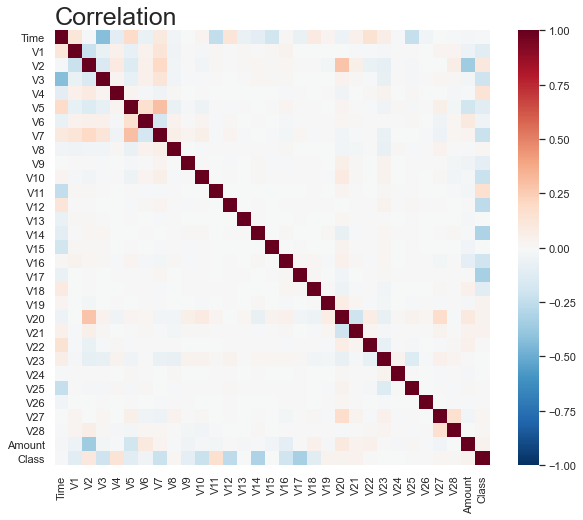

In [21]:
corr = correlation(df ,10,8)


No Fraud = 0 | Fraud = 1

0    99.820098
1     0.179902
Name: Class, dtype: float64


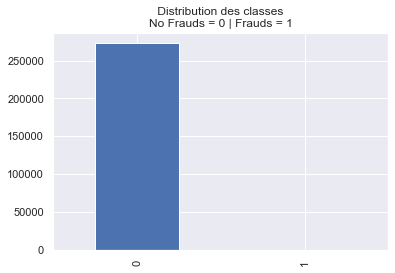

In [22]:
print('\nNo Fraud = 0 | Fraud = 1\n')
print(df['Class'].value_counts(normalize = True)*100)
# Graphe des classes 
df['Class'].value_counts().plot(kind = 'bar', title = ' Distribution des classes \nNo Frauds = 0 | Frauds = 1');

In [23]:
y = df['Class']
x = df.drop('Class',axis = 1)
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.3,random_state = 42)

# Application du RESAMPLING

Undersampling

In [24]:
#step 1
xTrain_rus,xTest_rus,yTrain_rus,yTest_rus = train_test_split(xTrain,yTrain,test_size = 0.2,random_state = 42)

1    290
0    290
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


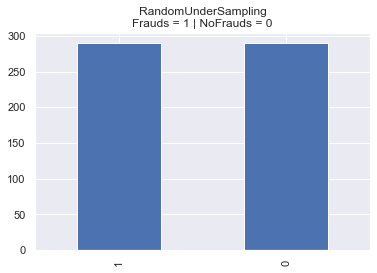

In [25]:
#step 2
rus = RandomUnderSampler()
x_rus,y_rus = rus.fit_sample(xTrain_rus,yTrain_rus)
#converting it to DataFrame to Visualize in pandas
df_x_rus = pd.DataFrame(x_rus)
df_x_rus['target'] = y_rus
print(df_x_rus['target'].value_counts())
print(df_x_rus['target'].value_counts().plot(kind = 'bar',title = 'RandomUnderSampling\nFrauds = 1 | NoFrauds = 0'))

In [26]:
x_rus

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.719048,-0.741376,0.967388,1.965767,2.568134,1.633937,0.530994,1.135971,-0.249694,-1.348546,...,-0.627068,-1.798545,-0.046467,0.329029,0.272794,-0.578912,-0.572185,-0.420343,0.052450,0
1,0.610967,2.089142,0.015998,-1.485967,0.240732,0.275723,-0.913944,0.220083,-0.324608,0.541100,...,0.239176,0.835180,0.026470,0.777427,0.304277,-0.142748,-0.022524,-0.051536,-0.312233,0
2,0.671072,2.018870,0.442409,-2.510490,0.588526,0.680478,-1.240870,0.177978,-0.155837,0.434135,...,0.120940,0.471634,-0.080813,-0.639746,0.219855,-0.090951,0.011934,-0.008563,-0.312233,0
3,-0.083658,1.354871,-0.548373,-0.142633,-0.827696,-0.543501,-0.746248,-0.190358,-0.244210,-0.944919,...,-0.302647,-1.182072,0.052043,-0.506471,0.281896,-0.597208,-0.021902,0.021981,0.918448,0
4,-0.007851,-1.178270,1.455628,0.842072,-0.122225,-0.546289,-0.795890,0.252403,0.416296,-0.365946,...,-0.056855,-0.288515,0.194950,0.503264,-0.859643,-0.087136,0.095277,0.233736,-0.049326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.635919,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,...,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,11.639592,1
576,-0.784477,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,19.712266,1
577,0.514311,-5.313774,2.664274,-4.250707,0.394707,-0.391383,0.683526,-5.133671,-7.907790,0.215475,...,8.664662,-2.716383,0.483559,0.079235,0.311065,0.555544,0.176740,0.362907,-0.312233,1
578,-0.264372,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,-0.310589,1


In [26]:
yc , lc, confc =comparaison_classification_credit_card(models,x_rus.iloc[:,:-1],y_rus,xTest,yTest)

print("méthode / paramètre / score ")
for i in yc:
    print(i)

NB
LR
LDA
CART
QDA
RF
KNN
SVM
méthode / paramètre / score 
('NB', {}, 0.973161070144433)
('LR', {'solver': 'newton-cg'}, 0.9585958924980194)
('LDA', {'solver': 'svd'}, 0.9893594978365531)
('CART', {'max_leaf_nodes': 6, 'min_samples_split': 2}, 0.9518800658175391)
('QDA', {'reg_param': 0.1}, 0.9550368700103602)
('RF', {'n_estimators': 5}, 0.9585958924980194)
('KNN', {'metric': 'manhattan', 'n_neighbors': 5}, 0.9797306356267902)
('SVM', {}, 0.9867389847035164)


In [27]:
meilleures_methodes(yc,lc, confc)

les meilleurs méthodes sont : (Méthode , paramètre, score)
('LDA', {'solver': 'svd'}, 0.9893594978365531)
le rapport de classification est :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     81910
           1       0.12      0.85      0.21       135

    accuracy                           0.99     82045
   macro avg       0.56      0.92      0.60     82045
weighted avg       1.00      0.99      0.99     82045



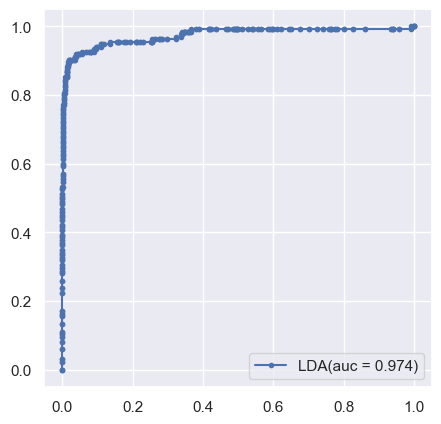

In [28]:
model = LinearDiscriminantAnalysis(solver= 'svd')
model.fit(x_rus.iloc[:,:-1],y_rus)
ypred = model.decision_function(xTest)
ypred
from sklearn.metrics import roc_curve, auc
lda_fpr, lda_tpr, treshold = roc_curve(yTest,ypred)
auc_lda= auc(lda_fpr, lda_tpr)
plt.figure(figsize=(5,5), dpi = 100)
plt.plot(lda_fpr, lda_tpr,marker='.',label='LDA(auc = %0.3f)' % auc_lda)
plt.legend()
plt.show()

Oversampling

1    152859
0    152859
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


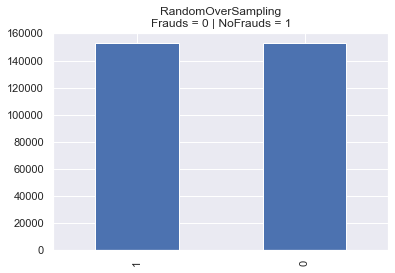

In [29]:
#step 1
xTrain_ros,xTest_ros,yTrain_ros,yTest_ros = train_test_split(xTrain,yTrain,test_size=0.2,random_state=42)

#step 2
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_sample(xTrain_ros,yTrain_ros)

#Converting it to dataframe to visualize in pandas
df_x_ros = pd.DataFrame(x_ros)
df_x_ros['target'] = y_ros
print(df_x_ros['target'].value_counts())
print(df_x_ros['target'].value_counts().plot(kind = 'bar',title = 'RandomOverSampling\nFrauds = 0 | NoFrauds = 1'))


In [30]:
yc , lc, confc = comparaison_classification_credit_card(models,x_ros.iloc[:,:-1],y_ros,xTest_ros,yTest_ros)
print("méthode / paramètre / score ")
for i in yc:
    print(i)

NB
LR
LDA
CART
QDA
RF
KNN
SVM
méthode / paramètre / score 
('NB', {}, 0.977094651065608)
('LR', {'solver': 'newton-cg'}, 0.9758409945674885)
('LDA', {'solver': 'svd'}, 0.9900229837024656)
('CART', {'max_leaf_nodes': 9, 'min_samples_split': 2}, 0.9649498537400752)
('QDA', {'reg_param': 0.1}, 0.9657856247388216)
('RF', {'n_estimators': 4}, 0.9995037609694943)
('KNN', {'metric': 'euclidean', 'n_neighbors': 2}, 0.9993731717509402)
('SVM', {}, 0.9889521521103217)


In [31]:
meilleures_methodes(yc,lc, confc)

les meilleurs méthodes sont : (Méthode , paramètre, score)
('RF', {'n_estimators': 4}, 0.9995037609694943)
le rapport de classification est :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38221
           1       0.93      0.78      0.85        67

    accuracy                           1.00     38288
   macro avg       0.96      0.89      0.92     38288
weighted avg       1.00      1.00      1.00     38288



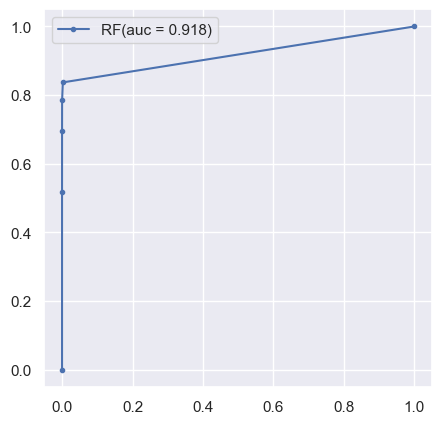

In [38]:
model = RandomForestClassifier(n_estimators = 4)
model.fit(x_ros.iloc[:,:-1],y_ros)
ypred = model.predict_proba(xTest)
ypred = ypred[:,1]
from sklearn.metrics import roc_curve, auc
rf_fpr, rf_tpr, treshold = roc_curve(yTest,ypred)
auc_rf= auc(rf_fpr, rf_tpr)
plt.figure(figsize=(5,5), dpi = 100)
plt.plot(rf_fpr, rf_tpr,marker='.',label='RF(auc = %0.3f)' % auc_rf)
plt.legend()
plt.show()

        SMOTE

1    152859
0    152859
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


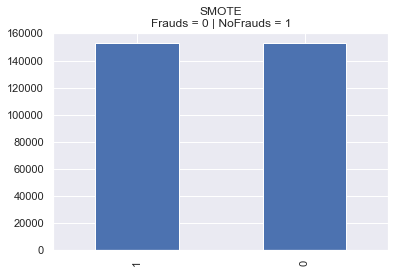

In [39]:
#step 1
xTrain_smote,xTest_smote,yTrain_smote,yTest_smote = train_test_split(xTrain,yTrain,test_size = 0.2,random_state = 42 )

#step2
smote = SMOTE()
x_smote,y_smote = smote.fit_sample(xTrain_smote,yTrain_smote)
#Converting it to dataframe to visualize in pandas
df_x_smote = pd.DataFrame(x_smote)
df_x_smote['target'] = y_smote
print(df_x_smote['target'].value_counts())
print(df_x_smote['target'].value_counts().plot(kind = 'bar',title = 'SMOTE\nFrauds = 0 | NoFrauds = 1'))

In [ ]:
yc , lc, confc = comparaison_classification(models,x_smote.iloc[:,:-1],y_smote,xTest_smote,yTest_smote)
print("méthode / paramètre / score ")
for i in yc:
    print(i)

NB
LR
LDA
CART
QDA
RF
KNN


In [10]:
meilleures_methodes(yc,lc, confc)

[1.         1.         0.996      0.99191837 0.99191837 0.9797551
 0.97983673 0.97167347 0.9717551  0.9435102  0.9515102  0.9195102
 0.91934694 0.87926531 0.87918367 0.83485714 0.85085714 0.79877551
 0.81085714 0.75853061 0.76261224 0.71828571 0.70220408 0.69804082
 0.66987755 0.64563265 0.62563265 0.61346939 0.62146939 0.60555102
 0.57697959 0.55697959 0.55297959 0.51657143 0.52457143 0.5122449
 0.49608163 0.47183673]


In [ ]:
model = RandomForestClassifier(n_estimators = 4)
model.fit(x_ros.iloc[:,:-1],y_ros)
ypred = model.predict_proba(xTest)
ypred = ypred[:,1]
from sklearn.metrics import roc_curve, auc
rf_fpr, rf_tpr, treshold = roc_curve(yTest,ypred)
auc_rf= auc(rf_fpr, rf_tpr)
plt.figure(figsize=(5,5), dpi = 100)
plt.plot(rf_fpr, rf_tpr,marker='.',label='RF(auc = %0.3f)' % auc_rf)
plt.legend()
plt.show()